 ## Installing and Loading Packages

In [2]:
# Python version used in this project
from platform import python_version
print('Python Version used in this Jupiter Nootebook:', python_version())

Python Version used in this Jupiter Nootebook: 3.9.13


In [23]:
#! pip install yfinance --upgrade --no-cache-dir
#! pip install pandas-datareader
#! pip install xlwt

In [3]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader
import sqlite3
import yfinance
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Packages versions used in this project
%reload_ext watermark
%watermark -a "Flavio F Ribeiro" --iversions

Author: Flavio F Ribeiro

pandas           : 1.4.4
yfinance         : 0.2.11
pandas_datareader: 0.10.0
matplotlib       : 3.5.2
numpy            : 1.21.5
sqlite3          : 2.6.0



## Creating the variable for the company stock data

In [5]:
AAPL = "AAPL"

In [6]:
AAPL = yfinance.download(AAPL)

[*********************100%***********************]  1 of 1 completed


In [7]:
AZN = "AZN"

In [8]:
AZN = yfinance.download(AZN)

[*********************100%***********************]  1 of 1 completed


## Exploratorion and Data Integrity Check

In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10633 entries, 1980-12-12 to 2023-02-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10633 non-null  float64
 1   High       10633 non-null  float64
 2   Low        10633 non-null  float64
 3   Close      10633 non-null  float64
 4   Adj Close  10633 non-null  float64
 5   Volume     10633 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 581.5 KB


In [10]:
AZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7495 entries, 1993-05-12 to 2023-02-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7495 non-null   float64
 1   High       7495 non-null   float64
 2   Low        7495 non-null   float64
 3   Close      7495 non-null   float64
 4   Adj Close  7495 non-null   float64
 5   Volume     7495 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 409.9 KB


## Saving in .xls and Loading in disc

### Saving in .xls

In [11]:
AAPL.to_excel("StockPrices/AAPL.xls")

In [12]:
AZN.to_excel("StockPrices/AZN.xls")

### Loading into Disc

In [13]:
df_apple = pd.read_excel("StockPrices/AAPL.xls")

In [14]:
df_azn = pd.read_excel("StockPrices/AZN.xls")

## Using SQL

In [24]:
#For Apple stocks
conn = sqlite3.connect("StockPrices/AAPL.db")
c = conn.cursor()

In [25]:
AAPL.to_sql("AAPL", conn, if_exists = 'replace')

10633

In [26]:
# SQL query to DataFrame
df_apple = pd.read_sql_query(""" SELECT * FROM AAPL WHERE Date >= "2020-01-01" """, conn)

In [27]:
df_apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02 00:00:00,74.059998,75.150002,73.797501,75.087502,73.449402,135480400
1,2020-01-03 00:00:00,74.287498,75.144997,74.125000,74.357498,72.735321,146322800
2,2020-01-06 00:00:00,73.447502,74.989998,73.187500,74.949997,73.314880,118387200
3,2020-01-07 00:00:00,74.959999,75.224998,74.370003,74.597504,72.970085,108872000
4,2020-01-08 00:00:00,74.290001,76.110001,74.290001,75.797501,74.143906,132079200
...,...,...,...,...,...,...,...
781,2023-02-08 00:00:00,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
782,2023-02-09 00:00:00,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
783,2023-02-10 00:00:00,149.460007,151.339996,149.220001,151.009995,151.009995,57409100
784,2023-02-13 00:00:00,150.949997,154.259995,150.919998,153.850006,153.850006,62123800


In [29]:
#Saves a .xls file from period from 2020
df_apple.to_excel("StockPrices/AAPLfrom020.xls")

In [30]:
#loads in disc again
df_apple = pd.read_excel("StockPrices/AAPLfrom020.xls")

In [32]:
df_apple.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2020-01-02 00:00:00,74.059998,75.150002,73.797501,75.087502,73.449402,135480400
1,1,2020-01-03 00:00:00,74.287498,75.144997,74.125000,74.357498,72.735321,146322800
2,2,2020-01-06 00:00:00,73.447502,74.989998,73.187500,74.949997,73.314880,118387200
3,3,2020-01-07 00:00:00,74.959999,75.224998,74.370003,74.597504,72.970085,108872000
4,4,2020-01-08 00:00:00,74.290001,76.110001,74.290001,75.797501,74.143906,132079200


In [33]:
#For AZN stocks
conn = sqlite3.connect("StockPrices/AZN.db")
c = conn.cursor()

In [34]:
AZN.to_sql("AZN", conn, if_exists = 'replace')

7495

In [35]:
# SQL query to DataFrame
df_azn = pd.read_sql_query(""" SELECT * FROM AZN WHERE Date >= "2020-01-01" """, conn)

In [36]:
df_azn

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02 00:00:00,50.299999,50.490002,50.130001,50.389999,46.576225,3587300
1,2020-01-03 00:00:00,49.880001,50.380001,49.830002,50.090000,46.298923,1208700
2,2020-01-06 00:00:00,50.040001,50.220001,49.740002,49.880001,46.104824,1992300
3,2020-01-07 00:00:00,50.139999,50.299999,49.869999,50.070000,46.280441,1871900
4,2020-01-08 00:00:00,49.869999,50.169998,49.750000,49.950001,46.169521,1869000
...,...,...,...,...,...,...,...
781,2023-02-08 00:00:00,65.269997,65.279999,64.199997,64.360001,64.360001,5036800
782,2023-02-09 00:00:00,68.309998,68.589996,67.279999,67.419998,67.419998,8368000
783,2023-02-10 00:00:00,68.610001,69.000000,68.209999,68.879997,68.879997,5918200
784,2023-02-13 00:00:00,68.529999,69.769997,68.500000,69.709999,69.709999,5003600


In [37]:
#Saves a .xls file from period from 2020
df_azn.to_excel("StockPrices/AZNfrom020.xls")

In [38]:
#loads in disc again
df_azn = pd.read_excel("StockPrices/aznfrom020.xls")

In [39]:
df_azn.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2020-01-02 00:00:00,50.299999,50.490002,50.130001,50.389999,46.576225,3587300
1,1,2020-01-03 00:00:00,49.880001,50.380001,49.830002,50.090000,46.298923,1208700
2,2,2020-01-06 00:00:00,50.040001,50.220001,49.740002,49.880001,46.104824,1992300
3,3,2020-01-07 00:00:00,50.139999,50.299999,49.869999,50.070000,46.280441,1871900
4,4,2020-01-08 00:00:00,49.869999,50.169998,49.750000,49.950001,46.169521,1869000


### Cheking data

In [40]:
#Checking 'Date' format.
df_apple['Date']

0      2020-01-02 00:00:00
1      2020-01-03 00:00:00
2      2020-01-06 00:00:00
3      2020-01-07 00:00:00
4      2020-01-08 00:00:00
              ...         
781    2023-02-08 00:00:00
782    2023-02-09 00:00:00
783    2023-02-10 00:00:00
784    2023-02-13 00:00:00
785    2023-02-14 00:00:00
Name: Date, Length: 786, dtype: object

In [41]:
#Checking 'Date' format.
df_azn['Date']

0      2020-01-02 00:00:00
1      2020-01-03 00:00:00
2      2020-01-06 00:00:00
3      2020-01-07 00:00:00
4      2020-01-08 00:00:00
              ...         
781    2023-02-08 00:00:00
782    2023-02-09 00:00:00
783    2023-02-10 00:00:00
784    2023-02-13 00:00:00
785    2023-02-14 00:00:00
Name: Date, Length: 786, dtype: object

In [42]:
#Transforminf date from object to datetime
df_apple['Date'] = pd.to_datetime(df_apple['Date'])
df_azn['Date'] = pd.to_datetime(df_azn['Date'])

In [43]:
#Checking Date data type
df_apple['Date']

0     2020-01-02
1     2020-01-03
2     2020-01-06
3     2020-01-07
4     2020-01-08
         ...    
781   2023-02-08
782   2023-02-09
783   2023-02-10
784   2023-02-13
785   2023-02-14
Name: Date, Length: 786, dtype: datetime64[ns]

In [44]:
df_azn['Date']

0     2020-01-02
1     2020-01-03
2     2020-01-06
3     2020-01-07
4     2020-01-08
         ...    
781   2023-02-08
782   2023-02-09
783   2023-02-10
784   2023-02-13
785   2023-02-14
Name: Date, Length: 786, dtype: datetime64[ns]

## Ploting the Graph

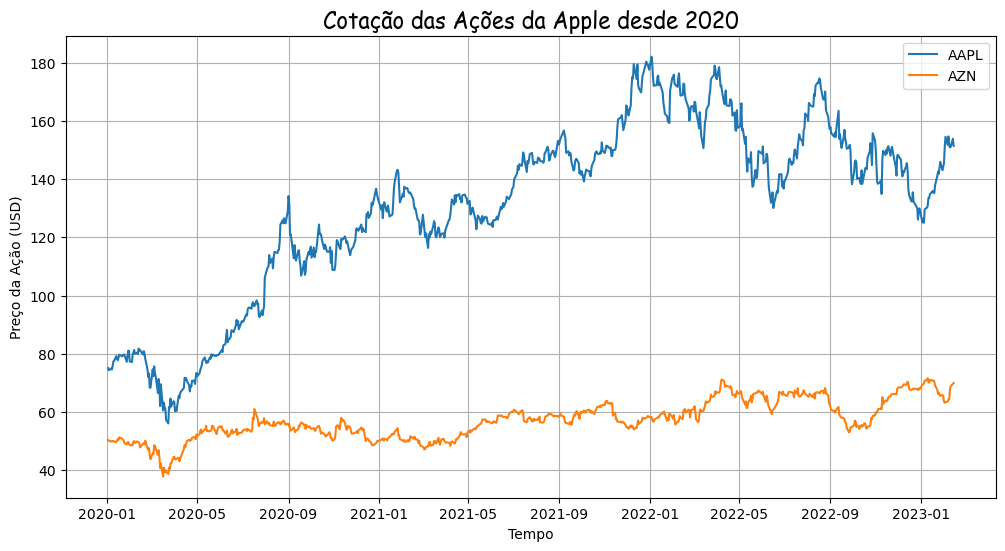

In [46]:
#Data Visualization

# Data in axis
x1 = df_apple['Date']
y1 = df_apple['Close']
x2 = df_azn['Date']
y2 = df_azn['Close']

# Graph's size (dpi)
plt.figure(figsize = (12,6), dpi = 100)

# Plot
plt.plot(x1, y1, label = 'AAPL')
plt.plot(x2, y2, label = 'AZN')

# Title
plt.title('Cotação das Ações da Apple desde 2020', 
          fontdict = {'fontname': 'Comic Sans MS', 'fontsize': 16})

# Label
plt.xlabel('Tempo')
plt.ylabel('Preço da Ação (USD)')

# legend = on
plt.legend()

#Grid = on
plt.grid()

# Saves image n high resolution
plt.savefig('imagens/APPLvsAZNSockPricefrom2020.png', dpi = 300)

# Plot
plt.show()